In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#import the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GOOG.csv')

In [3]:
#print first few rows of the dataset
dataset.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
training_set = dataset.iloc[:,1:2].values
print(training_set.shape)

(1258, 1)


In [5]:
#convert date from string to date datatype
dataset['date'] = pd.to_datetime(dataset['date'])  # Replace 'Date' with the actual column name
dataset['Timestamp'] = dataset['date'].astype(int) / 10**9  # Convert to Unix timestamp

# Select the numeric timestamp column for scaling
training_set = dataset['Timestamp'].values.reshape(-1, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00000000e+00],
       [5.48546352e-04],
       [1.09709270e-03],
       ...,
       [9.98902907e-01],
       [9.99451454e-01],
       [1.00000000e+00]])

In [7]:
x_train =[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0]) # Directly append the value
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
#Building the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

reg = Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#fitting the model
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.0954
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0048
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - loss: 0.0037
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0033
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - loss: 0.0034
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0033
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0038
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0024
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0023
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0026
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0028
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0025
Epoch 13/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - loss: 0.0026
Epoch 14/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0025
Epoch 15/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - l

In [11]:
#extracting the actual stock price
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_dataset.csv')
test_stock_price = test.iloc[:,1:2].values

In [12]:
x_test = []
for i in range(60,80):
  x_test.append(test_stock_price[i-60:i,0])
x_test = np.array(x_test)

In [13]:
pred = reg.predict(x_test)
pred = sc.inverse_transform(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Plotting Actual vs Predicted

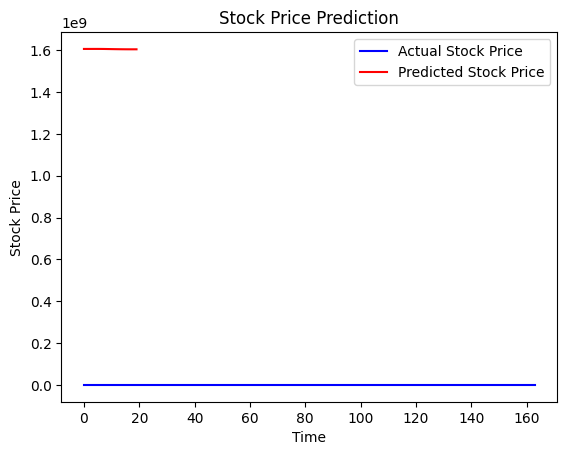

In [18]:
import matplotlib.pyplot as plt
# Assuming 'test_stock_price' contains the actual prices for the test period
plt.plot(test_stock_price[60:], color='blue', label='Actual Stock Price')
plt.plot(pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
